## VWAP Trading Strategy

### 1. Identify the Trend
- If the **price is above VWAP**, the stock is in an **uptrend**.
- If the **price is below VWAP**, the stock is in a **downtrend**.

### 2. Look for a Pullback to VWAP
- When the price **pulls back to VWAP in an uptrend**, consider entering a **long (buy) position**.
- When the price **pulls back to VWAP in a downtrend**, consider entering a **short (sell) position**.

### 3. Confirm with Volume
- If the stock **bounces off VWAP with increasing volume**, it’s a good sign of a strong move.

### 4. Set Stop-Loss & Target
- Place a **stop-loss** slightly **below VWAP (for long trades)** or **above VWAP (for short trades)**.
- Aim for a **1.5x to 2x reward-to-risk ratio**.

# How MACD Works

### 1. Short-term vs. Long-term Averages:
- The **MACD** uses two **Exponential Moving Averages (EMAs)**:
  - **12-day EMA (short-term)**: Responds quickly to recent price changes.
  - **26-day EMA (long-term)**: Slower to react to price changes.

### 2. Difference Between the Two:
- The **MACD line** is simply the difference between the **12-day** and **26-day** EMAs.
- If the **12-day EMA** is above the **26-day EMA**, the MACD will be **positive**, indicating **bullish momentum** (uptrend).
- If the **12-day EMA** is below the **26-day EMA**, the MACD will be **negative**, indicating **bearish momentum** (downtrend).

### 3. Signal Line:
- The **Signal Line** is a **9-day EMA** of the MACD line.
- When the **MACD line** crosses **above** the **Signal Line**, it’s a signal to **buy** (bullish).
- When the **MACD line** crosses **below** the **Signal Line**, it’s a signal to **sell** (bearish).

### 4. Histogram:
- The **Histogram** represents the difference between the **MACD line** and the **Signal Line**.
- When the **MACD line** is **above** the Signal Line, the histogram is **positive** (green bars).
- When the **MACD line** is **below** the Signal Line, the histogram is **negative** (red bars).

### In Summary:
- **MACD Line**: Difference between **short-term (12-day)** and **long-term (26-day)** EMAs.
- **Signal Line**: A smoother line (**9-day EMA**) that helps confirm signals.
- **Histogram**: Shows how far apart the MACD and Signal lines are.

[*********************100%***********************]  1 of 1 completed
/Users/mmsh/.pyenv/versions/3.11.6/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


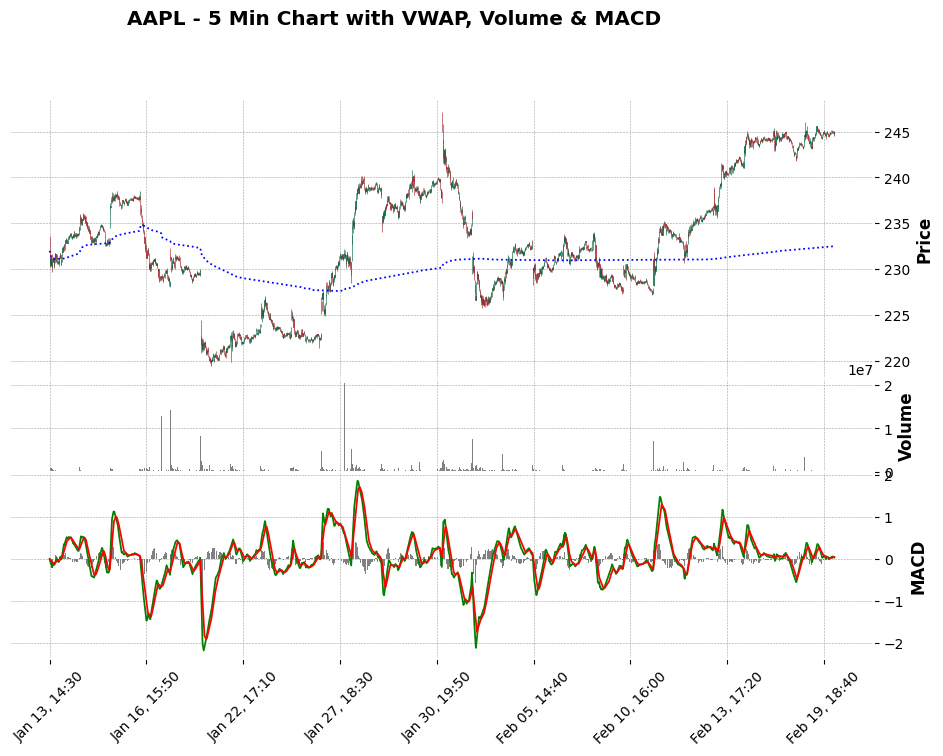

In [56]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Download historical 5-minute data for a stock (e.g., AAPL)
ticker ="AAPL"
df = yf.download(ticker, interval="5m", period="26d")

# Ensure columns are properly named
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate VWAP
df["Typical Price"] = (df["High"] + df["Low"] + df["Close"]) / 3
df["Cumulative TP*Volume"] = (df["Typical Price"] * df["Volume"]).cumsum()
df["Cumulative Volume"] = df["Volume"].cumsum()
df["VWAP"] = df["Cumulative TP*Volume"] / df["Cumulative Volume"]

# Calculate MACD
df["12 EMA"] = df["Close"].ewm(span=12, adjust=False).mean()
df["26 EMA"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["12 EMA"] - df["26 EMA"]
df["Signal Line"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["Histogram"] = df["MACD"] - df["Signal Line"]

# ---- ADDPLOTS ---- #
# VWAP on Main Chart (Panel 0)
ap_vwap = mpf.make_addplot(df["VWAP"], color="blue", linestyle="dotted", panel=0)

# Volume on a Separate Panel (Panel 1)
ap_volume = mpf.make_addplot(df["Volume"], panel=1, type="bar", color="gray", secondary_y=False, ylabel="Volume")

# MACD on Separate Panel (Panel 2)
ap_macd = mpf.make_addplot(df["MACD"], panel=2, color="green", secondary_y=False, ylabel="MACD")
ap_signal = mpf.make_addplot(df["Signal Line"], panel=2, color="red", secondary_y=False)
ap_histogram = mpf.make_addplot(df["Histogram"], panel=2, type="bar", color="gray", secondary_y=False)

# ---- PLOT ---- #
mpf.plot(df, type="candle", style="charles",
         addplot=[ap_vwap, ap_volume, ap_macd, ap_signal, ap_histogram],
         title=f"{ticker} - 5 Min Chart with VWAP, Volume & MACD",
         figsize=(12,8), panel_ratios=(3,1,2))

[*********************100%***********************]  1 of 1 completed
/Users/mmsh/.pyenv/versions/3.11.6/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


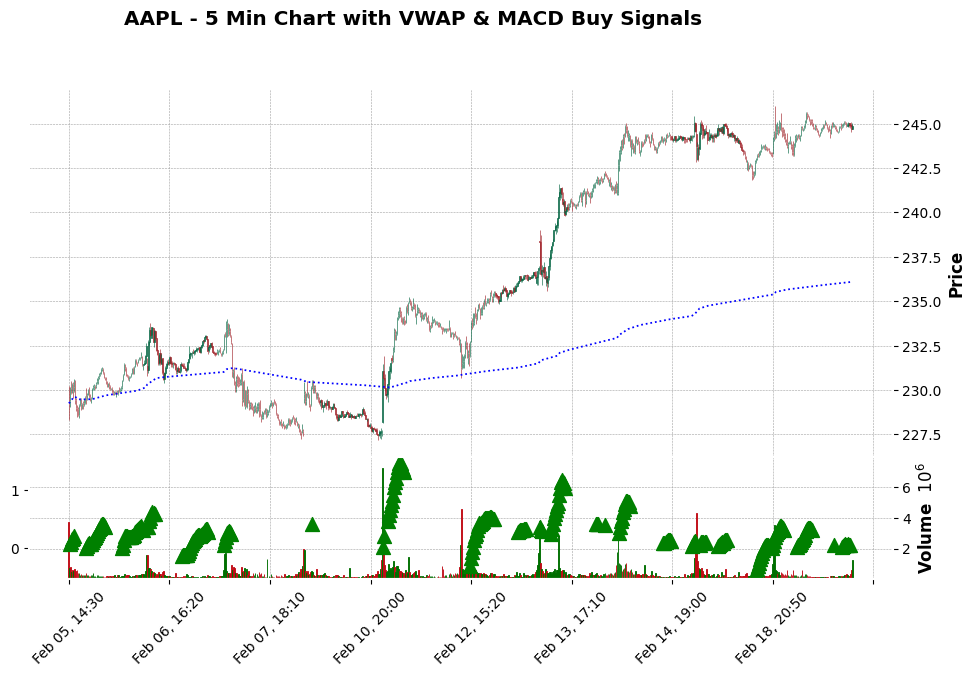

In [52]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

# Download historical 5-minute data for a stock (e.g., AAPL)
ticker = "AAPL"
df = yf.download(ticker, interval="5m", period="10d")

# Ensure columns are properly named
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate VWAP
df["Typical Price"] = (df["High"] + df["Low"] + df["Close"]) / 3
df["Cumulative TP*Volume"] = (df["Typical Price"] * df["Volume"]).cumsum()
df["Cumulative Volume"] = df["Volume"].cumsum()
df["VWAP"] = df["Cumulative TP*Volume"] / df["Cumulative Volume"]

# Calculate MACD
df["12 EMA"] = df["Close"].ewm(span=12, adjust=False).mean()
df["26 EMA"] = df["Close"].ewm(span=26, adjust=False).mean()
df["MACD"] = df["12 EMA"] - df["26 EMA"]
df["Signal Line"] = df["MACD"].ewm(span=9, adjust=False).mean()
df["Histogram"] = df["MACD"] - df["Signal Line"]

# Identify Buy Signals (MACD crosses above Signal Line & Price above VWAP)
df["Buy Signal"] = (df["MACD"] > df["Signal Line"]) & (df["Close"] > df["VWAP"])

# Extract Buy Signal Points (Ensure alignment with df)
buy_signals = df[df["Buy Signal"]].reindex(df.index)

# ---- ADDPLOTS ---- #
# VWAP on Main Chart
ap_vwap = mpf.make_addplot(df["VWAP"], color="blue", linestyle="dotted", panel=0)

# MACD and Signal Line on Separate Panel
ap_macd = mpf.make_addplot(df["MACD"], panel=1, color="green", secondary_y=False)  # Green curve
ap_signal = mpf.make_addplot(df["Signal Line"], panel=1, color="red", secondary_y=False)  # Red curve
ap_histogram = mpf.make_addplot(df["Histogram"], panel=1, type="bar", color="gray", secondary_y=False)  # Gray bars

# Buy Markers on MACD Line
ap_buy_markers = mpf.make_addplot(buy_signals["MACD"], type="scatter", marker="^", color="green", markersize=100, panel=1)

# ---- PLOT ---- #
mpf.plot(df, type="candle", style="charles", volume=True,
         addplot=[ap_vwap, ap_macd, ap_signal, ap_histogram, ap_buy_markers],
         title=f"{ticker} - 5 Min Chart with VWAP & MACD Buy Signals",
         figsize=(12,7), panel_ratios=(3,1))  # Adjust panel size for MACD

This is the Big Runner Strategy I found on Reddit:https://www.tradingview.com/script/HZCxKOpE-Big-Runner/

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Parameters
initial_capital = 100000
fast_length = 3  # Shorter fast length for day trading
slow_length = 10  # Shorter slow length for day trading
ribbon_length = 10  # Optionally, shorten for intraday
take_profit_long_percent = 0.01  # 1% Take Profit
take_profit_short_percent = 0.01  # 1% Take Profit
stop_loss_long_percent = 0.01  # 1% Stop Loss
stop_loss_short_percent = 0.01  # 1% Stop Loss
portfolio_percent = 10  # % of portfolio per trade
use_sl_tp = True  # Toggle for SL/TP

# Leverage Input (Adjustable for day trading)
leverage = 5  # Leverage for day trading
def fetch_intraday_data(ticker, start_date, end_date, interval='5m'):
    # Create a list to store data
    data = []
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    # Fetch data in chunks (e.g., 7 days at a time)
    chunk_size = 7  # days per chunk
    for i in range(0, (end - start).days, chunk_size):
        chunk_start = (start + pd.Timedelta(days=i)).strftime('%Y-%m-%d')
        chunk_end = (start + pd.Timedelta(days=min(i + chunk_size, (end - start).days))).strftime('%Y-%m-%d')
        print(f"Fetching data from {chunk_start} to {chunk_end}...")
        df = yf.download(ticker, start=chunk_start, end=chunk_end, interval=interval)
        data.append(df)
        
    # Combine all data into one DataFrame
    combined_df = pd.concat(data)
    return combined_df
# Download intraday data (1-minute or 5-minute data for day trading)
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2024-12-31'

df = fetch_intraday_data(ticker, start_date, end_date, interval='5m')
df = df.drop(columns=['Adj Close'], errors='ignore')
# Ensure columns are properly named
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
# Drop any extra columns, e.g., 'Adj Close'

# Calculate Moving Averages
df['fastMA'] = df['Close'].rolling(fast_length).mean()
df['slowMA'] = df['Close'].rolling(slow_length).mean()
df['ribbonMA'] = df['Close'].rolling(ribbon_length).mean()

# Drop initial NaNs
df = df.dropna(subset=['fastMA', 'slowMA', 'ribbonMA']).copy()


# Buy and Sell Signals (Crossover strategy)
df['buySignal'] = (df['fastMA'] > df['slowMA']) & (df['fastMA'].shift(1) <= df['slowMA'].shift(1))
df['sellSignal'] = (df['fastMA'] < df['slowMA']) & (df['fastMA'].shift(1) >= df['slowMA'].shift(1))

# Capital tracking
capital = initial_capital
position_size = 0
entry_price = np.nan
in_trade = False
trade_log = []

# Calculate SL/TP levels
def calculate_sl_tp(entryPrice, isLong):
    if isLong:
        stopLoss = entryPrice * (1 - stop_loss_long_percent)
        takeProfit = entryPrice * (1 + take_profit_long_percent)
    else:
        stopLoss = entryPrice * (1 + stop_loss_short_percent)
        takeProfit = entryPrice * (1 - take_profit_short_percent)
    return stopLoss, takeProfit

# Track trades
for i in range(1, len(df)):
    if in_trade:
        # Check for stop loss or take profit
        if df['Low'][i] <= stopLoss:
            pnl = (stopLoss - entry_price) * position_size
            capital += pnl
            trade_log.append({'date': df.index[i], 'type': 'Stopped Out', 'pnl': pnl, 'exitReason': "Stop Loss"})
            in_trade = False
            df.loc[df.index[i], 'position'] = 0
        elif df['High'][i] >= takeProfit:
            pnl = (takeProfit - entry_price) * position_size
            capital += pnl
            trade_log.append({'date': df.index[i], 'type': 'Take Profit', 'pnl': pnl, 'exitReason': "Take Profit"})
            in_trade = False
            df.loc[df.index[i], 'position'] = 0
        else:
            # Hold position
            df.loc[df.index[i], 'position'] = 1
    else:
        if df['buySignal'][i]:
            entry_price = df['Close'][i]
            position_size = (capital * (portfolio_percent / 100)) * leverage / entry_price
            stopLoss, takeProfit = calculate_sl_tp(entry_price, True)
            df.loc[df.index[i], 'position'] = 1
            in_trade = True
            trade_log.append({'date': df.index[i], 'type': 'Buy Entry', 'pnl': 0, 'exitReason': ""})
        elif df['sellSignal'][i]:
            entry_price = df['Close'][i]
            position_size = (capital * (portfolio_percent / 100)) * leverage / entry_price
            stopLoss, takeProfit = calculate_sl_tp(entry_price, False)
            df.loc[df.index[i], 'position'] = -1
            in_trade = True
            trade_log.append({'date': df.index[i], 'type': 'Sell Entry', 'pnl': 0, 'exitReason': ""})

# Convert trade log to DataFrame
trade_log_df = pd.DataFrame(trade_log)

# Plot Results
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Close Price', color='black')
plt.plot(df.index, df['fastMA'], label=f'Fast MA ({fast_length})', color='blue')
plt.plot(df.index, df['slowMA'], label=f'Slow MA ({slow_length})', color='red')

# Buy and Sell Signals
plt.scatter(df.index[df['buySignal']], df['Close'][df['buySignal']], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(df.index[df['sellSignal']], df['Close'][df['sellSignal']], marker='v', color='red', label='Sell Signal', s=100)

# Plot Entry/Exit Points
for _, row in trade_log_df.iterrows():
    if row['type'] == 'Buy Entry':
        plt.scatter(row['date'], df.loc[row['date'], 'Close'], color='lime', s=100, edgecolors='black', label='Entry' if 'Entry' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif row['type'] in ['Stopped Out', 'Take Profit']:
        plt.scatter(row['date'], df.loc[row['date'], 'Close'], color='red', s=100, edgecolors='black', label='Exit' if 'Exit' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.title(f'{ticker} - Big Runner Strategy Backtest for Day Trading')
plt.legend()
plt.show()

# Print Final Capital & PnL Summary
total_pnl = capital - initial_capital
print(f"Final Capital: ${capital:.2f}")
print(f"Total PnL: ${total_pnl:.2f}")
print(trade_log_df)

[*********************100%***********************]  1 of 1 completed
/Users/mmsh/Documents/repos/TradingAgent/.venv/lib/python3.13/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


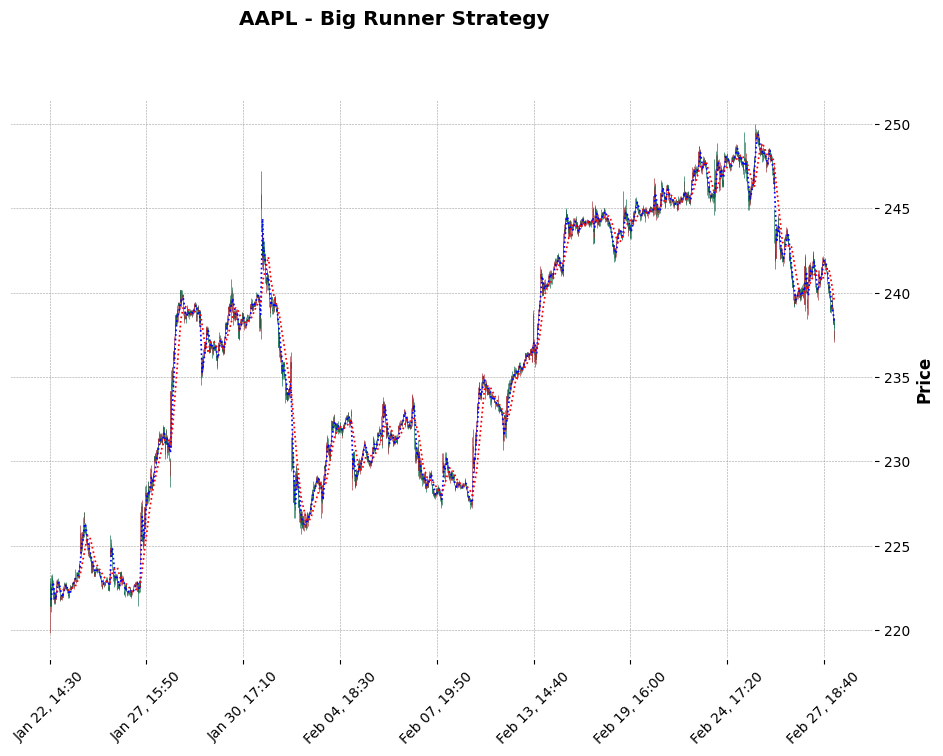

/Users/mmsh/Documents/repos/TradingAgent/.venv/lib/python3.13/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


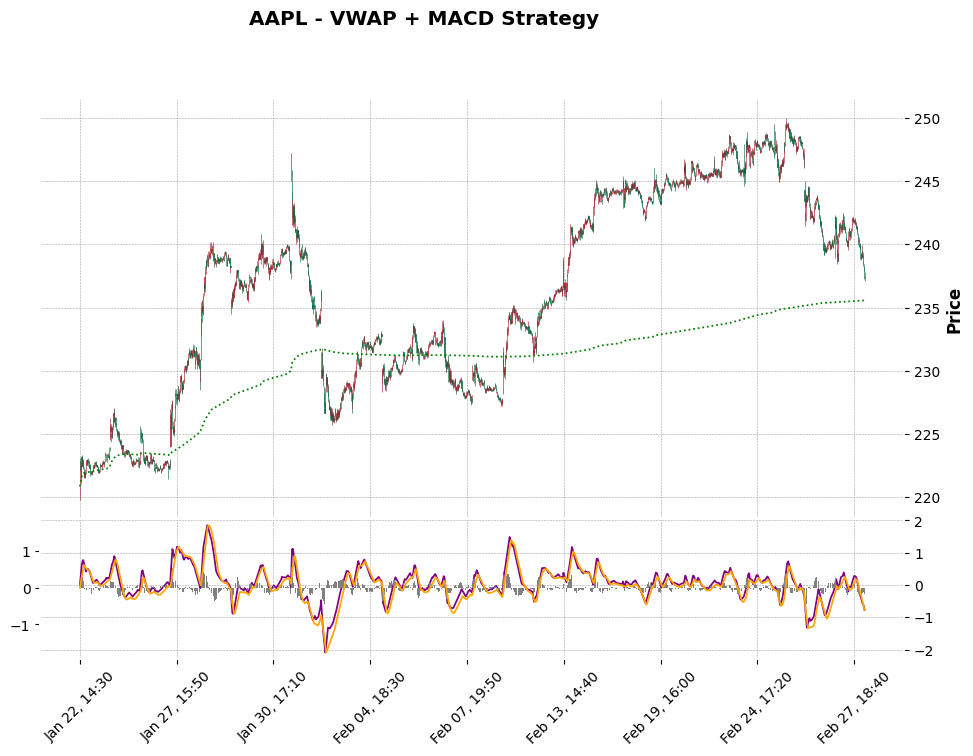

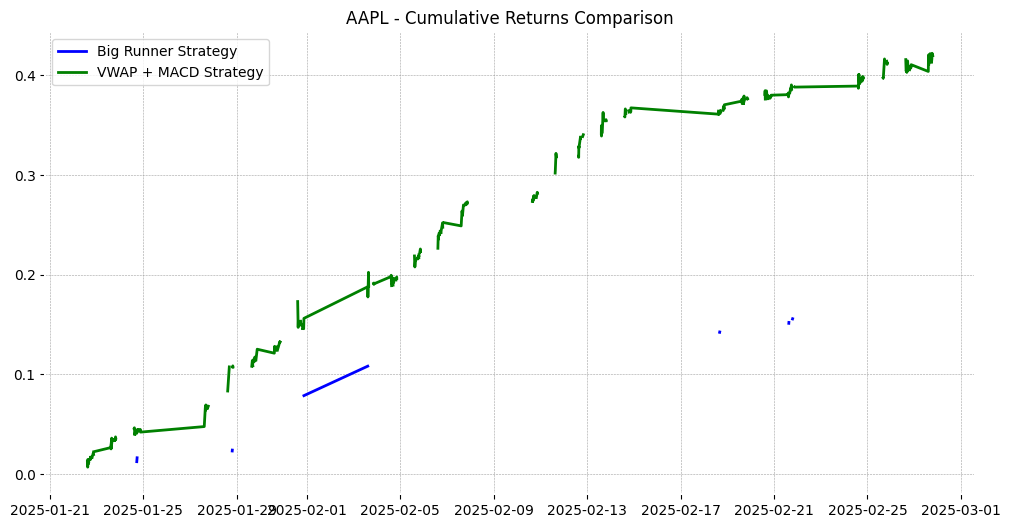

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# Download historical 5-minute data for a stock (e.g., AAPL)
ticker = "AAPL"
df = yf.download(ticker, interval="5m", period="26d")

# Ensure columns are properly named
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# ---------------------------- Big Runner Strategy ---------------------------- #
# Calculate Fast and Slow Moving Averages
fast_length = 5
slow_length = 20
df['fastMA'] = df['Close'].rolling(window=fast_length).mean()
df['slowMA'] = df['Close'].rolling(window=slow_length).mean()

# Define buy and sell signals for Big Runner Strategy
df['buySignal'] = (df['fastMA'] > df['slowMA']) & (df['fastMA'].shift(1) <= df['slowMA'].shift(1))
df['sellSignal'] = (df['fastMA'] < df['slowMA']) & (df['fastMA'].shift(1) >= df['slowMA'].shift(1))

# ---------------------------- VWAP + MACD Strategy ---------------------------- #
# Calculate VWAP
df['Typical Price'] = (df['High'] + df['Low'] + df['Close']) / 3
df['Cumulative TP*Volume'] = (df['Typical Price'] * df['Volume']).cumsum()
df['Cumulative Volume'] = df['Volume'].cumsum()
df['VWAP'] = df['Cumulative TP*Volume'] / df['Cumulative Volume']

# Calculate MACD
df['12 EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
df['26 EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['12 EMA'] - df['26 EMA']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['Histogram'] = df['MACD'] - df['Signal Line']

# Define buy and sell signals for VWAP + MACD Strategy
df['vwapBuySignal'] = (df['Close'] > df['VWAP']) & (df['MACD'] > df['Signal Line'])
df['vwapSellSignal'] = (df['Close'] < df['VWAP']) & (df['MACD'] < df['Signal Line'])

# ---------------------------- Visualize Both Strategies ---------------------------- #
# Create plots for Big Runner and VWAP + MACD
# ---- Big Runner Strategy ---- #
ap_fastMA = mpf.make_addplot(df['fastMA'], color='blue', linestyle='dotted', panel=0)
ap_slowMA = mpf.make_addplot(df['slowMA'], color='red', linestyle='dotted', panel=0)

# ---- VWAP and MACD ---- #
ap_vwap = mpf.make_addplot(df['VWAP'], color='green', linestyle='dotted', panel=0)
ap_macd = mpf.make_addplot(df['MACD'], color='purple', panel=1)
ap_signal = mpf.make_addplot(df['Signal Line'], color='orange', panel=1)
ap_histogram = mpf.make_addplot(df['Histogram'], type='bar', color='gray', panel=1)

# Plot Big Runner Strategy
mpf.plot(df, type="candle", style="charles", title=f"{ticker} - Big Runner Strategy",
         addplot=[ap_fastMA, ap_slowMA], figsize=(12, 8), panel_ratios=(1,))  # Single panel for Big Runner

# Plot VWAP + MACD Strategy
mpf.plot(df, type="candle", style="charles", title=f"{ticker} - VWAP + MACD Strategy",
         addplot=[ap_vwap, ap_macd, ap_signal, ap_histogram], figsize=(12, 8), panel_ratios=(3, 1))  # 2 panels for VWAP+MACD

# ---------------------------- Calculate Performance ---------------------------- #
# Calculate returns for Big Runner Strategy
df['BigRunnerReturns'] = np.nan
df.loc[df['buySignal'], 'BigRunnerReturns'] = df['Close'].pct_change()
df.loc[df['sellSignal'], 'BigRunnerReturns'] = -df['Close'].pct_change()

# Calculate returns for VWAP + MACD Strategy
df['VWAPMACDReturns'] = np.nan
df.loc[df['vwapBuySignal'], 'VWAPMACDReturns'] = df['Close'].pct_change()
df.loc[df['vwapSellSignal'], 'VWAPMACDReturns'] = -df['Close'].pct_change()

# Calculate cumulative returns for both strategies
df['BigRunnerCumulative'] = (1 + df['BigRunnerReturns']).cumprod() - 1
df['VWAPMACDCumulative'] = (1 + df['VWAPMACDReturns']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(df['BigRunnerCumulative'], label='Big Runner Strategy', color='blue')
plt.plot(df['VWAPMACDCumulative'], label='VWAP + MACD Strategy', color='green')
plt.title(f'{ticker} - Cumulative Returns Comparison')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


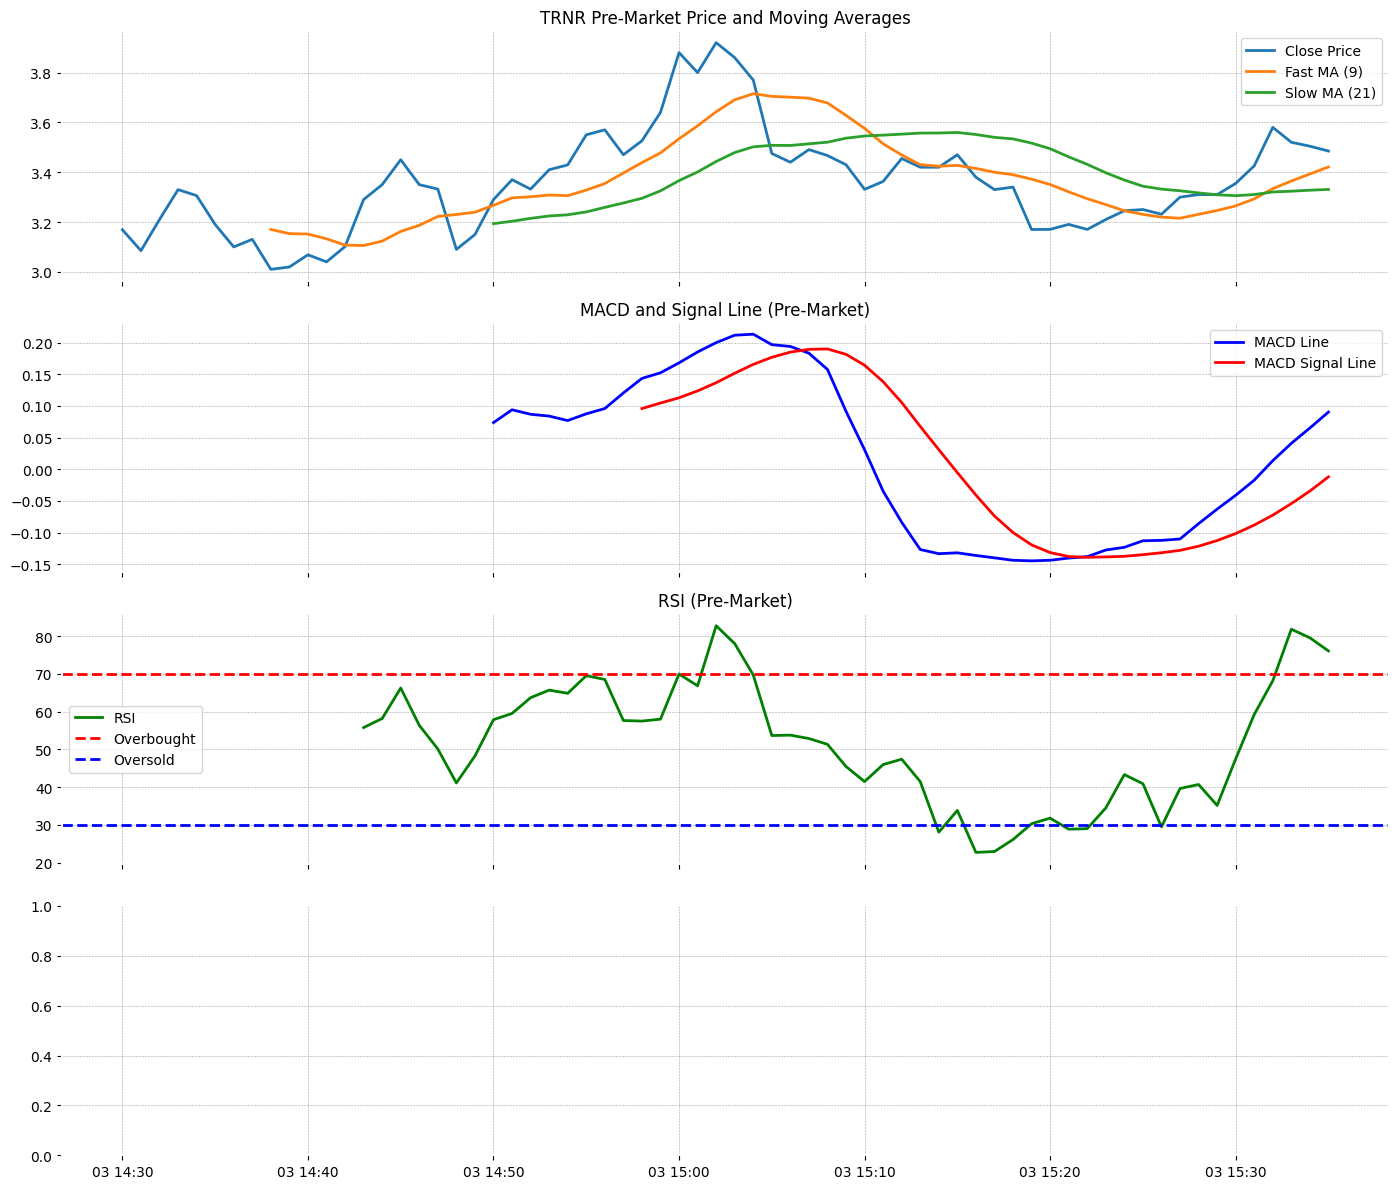

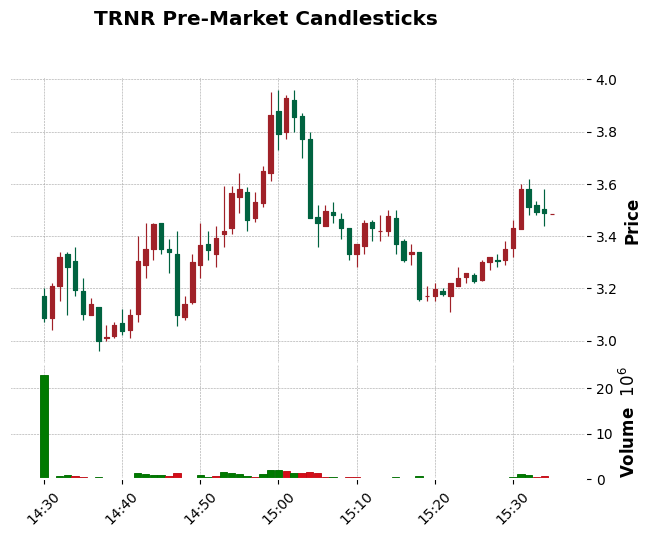


Final Capital: $100000.00
Total Trades: 0
Win Rate: 0.00%
Total Profit: $0.00
Total Loss: $0.00


(100000.0, 0, 0, 0.0, 0.0)

In [85]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import datetime, timedelta
import numpy as np

def download_data_in_chunks(ticker, start_date, end_date, max_chunk_days=5, interval='1m'):
    """
    Download stock data in chunks from Yahoo Finance, ensuring each chunk is at most 5 days apart.
    """
    start = datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.strptime(end_date, '%Y-%m-%d')
    all_data = pd.DataFrame()
    
    while start < end:
        chunk_end = min(start + timedelta(days=max_chunk_days), end)
        df_chunk = yf.download(ticker, start=start.date(), end=chunk_end.date(), interval=interval)
        all_data = pd.concat([all_data, df_chunk])
        start = chunk_end
    
    return all_data

def filter_premarket(df):
    """
    Filter the data to include only pre-market trading hours (4:00 AM - 9:30 AM EST).
    """
    df['Time'] = df.index.time
    premarket_start = datetime.strptime('07:00:00', '%H:%M:%S').time()
    premarket_end = datetime.strptime('10:30:00', '%H:%M:%S').time()

    # Filter data between 4:00 AM and 9:30 AM
    premarket_data = df[(df['Time'] >= premarket_start) & (df['Time'] <= premarket_end)]
    
    return premarket_data

def backtest_strategy(ticker, start_date, end_date, risk_factor=0.1):
    """
    Backtest trading strategy on pre-market data for the given ticker and calculate win rate.
    """
    df = download_data_in_chunks(ticker, start_date, end_date, max_chunk_days=5, interval='1m')
    
    # Set column names explicitly
    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
    # Ensure all columns are of type float (for mplfinance compatibility)
    df = df.astype({'Open': 'float', 'High': 'float', 'Low': 'float', 'Close': 'float', 'Volume': 'int'})
    
    # Filter to only pre-market data
    df_premarket = df.copy()
    
    # Calculate moving averages and MACD on pre-market data
    df_premarket['fast_ma'] = df_premarket['Close'].rolling(window=9).mean()  # Fast MA
    df_premarket['slow_ma'] = df_premarket['Close'].rolling(window=21).mean()  # Slow MA
    df_premarket['macd_line'] = df_premarket['fast_ma'] - df_premarket['slow_ma']
    df_premarket['macd_signal'] = df_premarket['macd_line'].rolling(window=9).mean()
    
    # RSI calculation on pre-market data
    delta = df_premarket['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df_premarket['RSI'] = 100 - (100 / (1 + rs))
    
    # Bollinger Bands calculation
    df_premarket['bollinger_mid'] = df_premarket['Close'].rolling(window=20).mean()
    df_premarket['bollinger_std'] = df_premarket['Close'].rolling(window=20).std()
    df_premarket['bollinger_upper'] = df_premarket['bollinger_mid'] + (2 * df_premarket['bollinger_std'])
    df_premarket['bollinger_lower'] = df_premarket['bollinger_mid'] - (2 * df_premarket['bollinger_std'])
    
    # Stochastic Oscillator calculation
    df_premarket['stochastic_k'] = 100 * (df_premarket['Close'] - df_premarket['Low'].rolling(window=14).min()) / (df_premarket['High'].rolling(window=14).max() - df_premarket['Low'].rolling(window=14).min())
    df_premarket['stochastic_d'] = df_premarket['stochastic_k'].rolling(window=3).mean()  # Smooth K with 3-period moving average
    
    # Average True Range (ATR) calculation
    df_premarket['high_low'] = df_premarket['High'] - df_premarket['Low']
    df_premarket['high_close'] = abs(df_premarket['High'] - df_premarket['Close'].shift())
    df_premarket['low_close'] = abs(df_premarket['Low'] - df_premarket['Close'].shift())
    df_premarket['tr'] = df_premarket[['high_low', 'high_close', 'low_close']].max(axis=1)
    df_premarket['ATR'] = df_premarket['tr'].rolling(window=14).mean()
    
    # On-Balance Volume (OBV) calculation
    df_premarket['obv'] = (np.sign(df_premarket['Close'].diff()) * df_premarket['Volume']).fillna(0).cumsum()

    # Signal detection with tolerance
    macd_diff = df_premarket['macd_line'] - df_premarket['macd_signal']
    
    # Define tolerance for detecting crossovers (small differences are allowed)
    tolerance = 0.1  # Adjust tolerance as needed
    
    # Generate buy/sell signals based on multiple indicators
    df_premarket['buy_signal'] = (
        (macd_diff > tolerance) & (macd_diff.shift(1) <= tolerance) &  # MACD crossover
        (df_premarket['RSI'] < 70) &  # RSI below 30 (oversold)
        (df_premarket['stochastic_k'] < 20) &  # Stochastic K below 20
        (df_premarket['Close'] < df_premarket['bollinger_lower'])  # Price below lower Bollinger Band
    )
    
    df_premarket['sell_signal'] = (
        (macd_diff < -tolerance) & (macd_diff.shift(1) >= -tolerance) &  # MACD crossover
        (df_premarket['RSI'] > 60) &  # RSI above 70 (overbought)
        (df_premarket['stochastic_k'] > 80) &  # Stochastic K above 80
        (df_premarket['Close'] > df_premarket['bollinger_upper'])  # Price above upper Bollinger Band
    )
    
    # Initialize variables for backtest logic
    capital = 100000.0  # Assume starting capital
    position = 0  # No position at the start
    entry_price = 0  # Entry price for calculating profits
    total_trades = 0
    win_trades = 0
    total_profit = 0.0
    total_loss = 0.0
    
    # List to track trades
    trades = []
    
    # Loop through the pre-market data to simulate trades
    for i in range(1, len(df_premarket)):
        if df_premarket['buy_signal'].iloc[i] and position == 0:  # Buy Signal
            # Position size based on risk factor (fraction of capital)
            position_size = capital * risk_factor  # Adjust risk_factor for trade size
            position = position_size / df_premarket['Close'].iloc[i]  # Buy as much as possible
            entry_price = df_premarket['Close'].iloc[i]
            total_trades += 1
            print(f"Buy at {entry_price} on {df_premarket.index[i]} | Position Size: {position_size}")
        
        elif df_premarket['sell_signal'].iloc[i] and position > 0:  # Sell Signal
            exit_price = df_premarket['Close'].iloc[i]
            profit_loss = (exit_price - entry_price) * position  # Calculate profit/loss from trade
            if profit_loss > 0:
                win_trades += 1
            else:
                total_loss += profit_loss  # Track total loss
            total_profit += profit_loss  # Add to total profit
            capital += profit_loss  # Update capital after the trade
            position = 0  # Close the position
            print(f"Sell at {exit_price} on {df_premarket.index[i]} | Profit/Loss: {profit_loss}")
    
    # Calculate win rate
    win_rate = (win_trades / total_trades) * 100 if total_trades > 0 else 0
    
    # Create subplots for the other charts
    fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)
    
    # Plot closing price with moving averages on pre-market data
    axs[0].plot(df_premarket['Close'], label='Close Price')
    axs[0].plot(df_premarket['fast_ma'], label='Fast MA (9)')
    axs[0].plot(df_premarket['slow_ma'], label='Slow MA (21)')
    axs[0].set_title(f'{ticker} Pre-Market Price and Moving Averages')
    axs[0].legend()
    
    # Plot MACD line and signal line on pre-market data
    axs[1].plot(df_premarket['macd_line'], label='MACD Line', color='b')
    axs[1].plot(df_premarket['macd_signal'], label='MACD Signal Line', color='r')
    axs[1].set_title('MACD and Signal Line (Pre-Market)')
    axs[1].legend()
    
    
    # Plot RSI on pre-market data
    axs[2].plot(df_premarket['RSI'], label='RSI', color='g')
    axs[2].axhline(70, color='r', linestyle='--', label='Overbought')
    axs[2].axhline(30, color='b', linestyle='--', label='Oversold')
    axs[2].set_title('RSI (Pre-Market)')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    # Plot candlesticks separately using mplfinance for pre-market data
    mpf.plot(df_premarket, type='candle', volume=True, title=f'{ticker} Pre-Market Candlesticks', style='charles')
    
    # Print final results
    print(f"\nFinal Capital: ${capital:.2f}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total Profit: ${total_profit:.2f}")
    print(f"Total Loss: ${total_loss:.2f}")
    
    return capital, total_trades, win_rate, total_profit, total_loss

# Example usage
ticker = 'TRNR'
start_date = '2025-03-01'
end_date = '2025-03-04'

backtest_strategy(ticker, start_date, end_date)

If there are issues installing TA-Lib, first run brew install ta-lib in ur mac-os termina


[*********************100%***********************]  1 of 1 completed
/var/folders/fb/6qpbgb_173g9nk8p1n6ckng80000gn/T/ipykernel_45117/2531577359.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i] > upper_band[i - 1]:
/var/folders/fb/6qpbgb_173g9nk8p1n6ckng80000gn/T/ipykernel_45117/2531577359.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Close'][i] < lower_band[i - 1]:
/var/folders/fb/6qpbgb_173g9nk8p1n6ckng80000gn/T/ipykernel_45117/2531577359.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

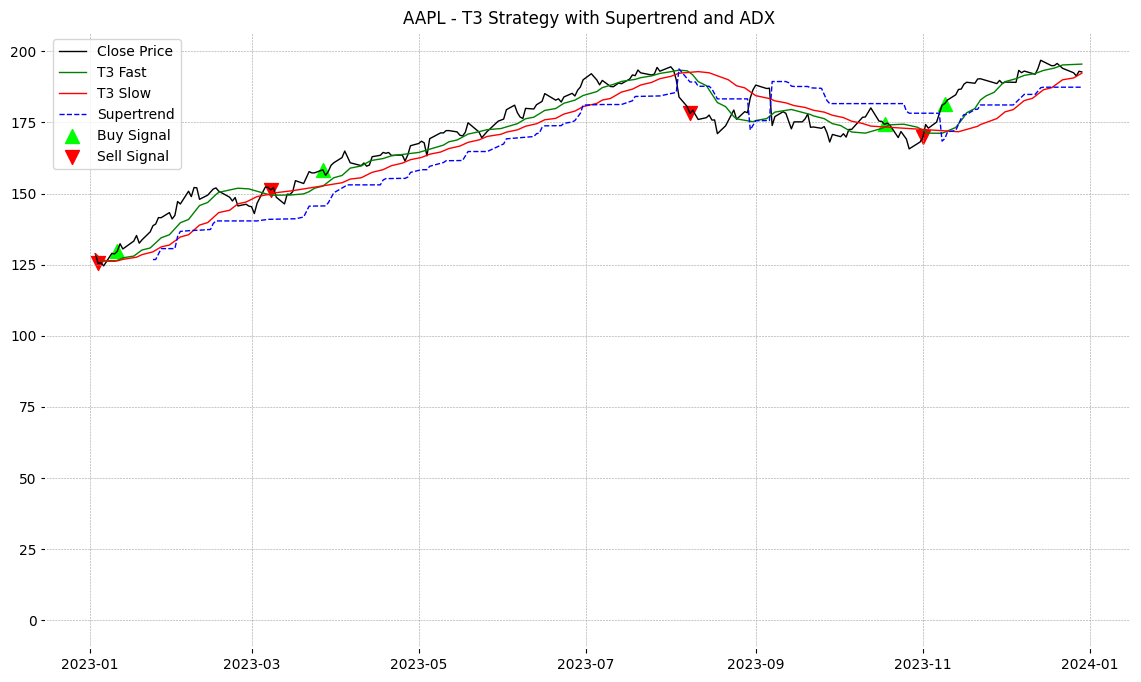

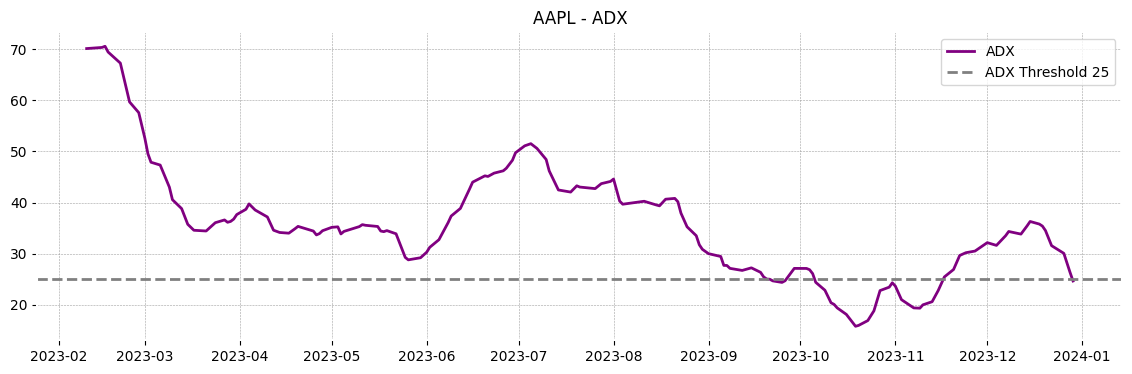

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta

def t3(series, length, factor):
    """ T3 Indicator (simplified) """
    ema1 = series.ewm(span=length).mean()
    ema2 = ema1.ewm(span=length).mean()
    ema3 = ema2.ewm(span=length).mean()
    ema4 = ema3.ewm(span=length).mean()
    ema5 = ema4.ewm(span=length).mean()
    ema6 = ema5.ewm(span=length).mean()
    
    c1 = -factor ** 3
    c2 = 3 * factor ** 2 + 3 * factor ** 3
    c3 = -6 * factor ** 2 - 3 * factor - 3 * factor ** 3
    c4 = 1 + 3 * factor + factor ** 3 + 3 * factor ** 2
    
    return c1 * ema6 + c2 * ema5 + c3 * ema4 + c4 * ema3

def adx_plus_minus_di(high, low, close, length):
    """ ADX, +DI, -DI Calculation """
    plus_di = ta.PLUS_DI(high, low, close, timeperiod=length)
    minus_di = ta.MINUS_DI(high, low, close, timeperiod=length)
    adx = ta.ADX(high, low, close, timeperiod=length)
    return adx, plus_di, minus_di

def supertrend(df, length=14, multiplier=3.0):
    """ SuperTrend Indicator """
    hl2 = (df['High'] + df['Low']) / 2
    atr = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=length)
    upper_band = hl2 + (multiplier * atr)
    lower_band = hl2 - (multiplier * atr)

    supertrend = np.zeros(len(df))
    in_uptrend = True

    for i in range(1, len(df)):
        if df['Close'][i] > upper_band[i - 1]:
            in_uptrend = True
        elif df['Close'][i] < lower_band[i - 1]:
            in_uptrend = False

        if in_uptrend:
            lower_band[i] = max(lower_band[i], lower_band[i - 1])
            supertrend[i] = lower_band[i]
        else:
            upper_band[i] = min(upper_band[i], upper_band[i - 1])
            supertrend[i] = upper_band[i]
    
    return supertrend, in_uptrend

# ================================
# SAMPLE DATA (Use Yahoo Finance or CSV file for real data)
# ================================
import yfinance as yf

symbol = 'AAPL'
df = yf.download(symbol, start='2025-03-01', end='2024-01-01')
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df['T3_Fast'] = t3(df['Close'], length=12, factor=0.7)
df['T3_Slow'] = t3(df['Close'], length=25, factor=0.7)

df['T3_Diff'] = df['T3_Fast'] - df['T3_Slow']
df['ADX'], df['+DI'], df['-DI'] = adx_plus_minus_di(df['High'], df['Low'], df['Close'], length=14)

df['Supertrend'], _ = supertrend(df)

df['BullishCross'] = (df['T3_Fast'] > df['T3_Slow']) & (df['T3_Fast'].shift(1) <= df['T3_Slow'].shift(1))
df['BearishCross'] = (df['T3_Fast'] < df['T3_Slow']) & (df['T3_Fast'].shift(1) >= df['T3_Slow'].shift(1))

# ================================
# PLOTTING
# ================================
plt.figure(figsize=(14, 8))

# Price and T3 Lines
plt.plot(df.index, df['Close'], label='Close Price', color='black', linewidth=1)
plt.plot(df.index, df['T3_Fast'], label='T3 Fast', color='green', linewidth=1)
plt.plot(df.index, df['T3_Slow'], label='T3 Slow', color='red', linewidth=1)

# Supertrend
plt.plot(df.index, df['Supertrend'], label='Supertrend', color='blue', linestyle='--', linewidth=1)

# Buy/Sell signals
plt.scatter(df.index[df['BullishCross']], df['Close'][df['BullishCross']], label='Buy Signal', marker='^', color='lime', s=100)
plt.scatter(df.index[df['BearishCross']], df['Close'][df['BearishCross']], label='Sell Signal', marker='v', color='red', s=100)

plt.legend()
plt.title(f'{symbol} - T3 Strategy with Supertrend and ADX')
plt.grid(True)
plt.show()

# ADX Plot
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['ADX'], label='ADX', color='purple')
plt.axhline(25, linestyle='--', color='gray', label='ADX Threshold 25')
plt.legend()
plt.title(f'{symbol} - ADX')
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed


Backtest Results for MLGO
Period: 2025-02-21 to 2025-03-05
Total Trades: 2
Win Rate: 50.00%
Average Win: 3.03%
Average Loss: -6.18%
Total Return: -3.33%
Max Drawdown: 0.00%



/var/folders/fb/6qpbgb_173g9nk8p1n6ckng80000gn/T/ipykernel_45117/2436647106.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['Close'][i] > upper_band[i - 1]:
/var/folders/fb/6qpbgb_173g9nk8p1n6ckng80000gn/T/ipykernel_45117/2436647106.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['Close'][i] < lower_band[i - 1]:
/var/folders/fb/6qpbgb_173g9nk8p1n6ckng80000gn/T/ipykernel_45117/2436647106.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

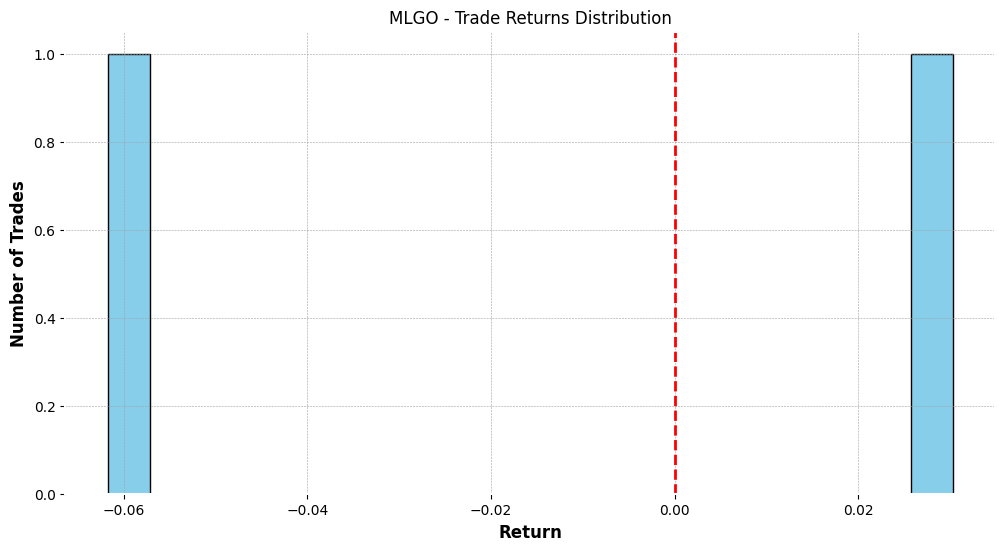


Sample Trades:
   entry_price                entry_time  exit_price  \
0       5.0200 2025-02-27 15:30:00+00:00       4.710   
1       4.1201 2025-03-04 15:50:00+00:00       4.245   

                  exit_time    return  
0 2025-02-27 15:55:00+00:00 -0.061753  
1 2025-03-04 15:55:00+00:00  0.030315  


In [106]:
import numpy as np
import pandas as pd
import yfinance as yf
import talib as ta
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal

# T3 Indicator Function
def t3(series, length, factor):
    ema1 = series.ewm(span=length).mean()
    ema2 = ema1.ewm(span=length).mean()
    ema3 = ema2.ewm(span=length).mean()
    ema4 = ema3.ewm(span=length).mean()
    ema5 = ema4.ewm(span=length).mean()
    ema6 = ema5.ewm(span=length).mean()

    c1 = -factor ** 3
    c2 = 3 * factor ** 2 + 3 * factor ** 3
    c3 = -6 * factor ** 2 - 3 * factor - 3 * factor ** 3
    c4 = 1 + 3 * factor + factor ** 3 + 3 * factor ** 2

    return c1 * ema6 + c2 * ema5 + c3 * ema4 + c4 * ema3

# Supertrend Calculation
def supertrend(df, length=14, multiplier=3.0):
    hl2 = (df['High'] + df['Low']) / 2
    atr = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=length)
    upper_band = hl2 + (multiplier * atr)
    lower_band = hl2 - (multiplier * atr)

    supertrend = np.zeros(len(df))
    in_uptrend = True

    for i in range(1, len(df)):
        if df['Close'][i] > upper_band[i - 1]:
            in_uptrend = True
        elif df['Close'][i] < lower_band[i - 1]:
            in_uptrend = False

        if in_uptrend:
            lower_band[i] = max(lower_band[i], lower_band[i - 1])
            supertrend[i] = lower_band[i]
        else:
            upper_band[i] = min(upper_band[i], upper_band[i - 1])
            supertrend[i] = upper_band[i]

    return supertrend, in_uptrend

# Fetch only valid trading days using NYSE calendar
def get_trading_days(start, end):
    nyse = mcal.get_calendar('NYSE')
    schedule = nyse.schedule(start_date=start, end_date=end)
    trading_days = schedule.index.normalize().strftime('%Y-%m-%d').tolist()
    return trading_days

# Fetch 5-minute intraday data from Yahoo, restricted to valid trading days
def get_data(symbol, start, end):
    trading_days = get_trading_days(start, end)
    if not trading_days:
        raise ValueError("No valid trading days in the specified range.")

    first_day = trading_days[0]
    last_day = trading_days[-1]

    df = yf.download(symbol, start=first_day, end=last_day, interval='5m')
    if df.empty:
        raise ValueError(f"No data found for {symbol} between {first_day} and {last_day}.")

    df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    df = df.between_time('09:30', '16:00')

    return df

# Backtest Function
def backtest_t3_supertrend(symbol, start, end):
    df = get_data(symbol, start, end)

    # Calculate Indicators
    df['T3_Fast'] = t3(df['Close'], length=12, factor=0.7)
    df['T3_Slow'] = t3(df['Close'], length=25, factor=0.7)
    df['Supertrend'], _ = supertrend(df)

    # Entry Criteria
    df['BullishCross'] = (df['T3_Fast'] > df['T3_Slow']) & (df['T3_Fast'].shift(1) <= df['T3_Slow'].shift(1))
    df['InUptrend'] = df['Close'] > df['Supertrend']
    df['BuySignal'] = df['BullishCross'] & df['InUptrend']

    # Intraday Backtesting Logic
    trades = []
    position = None

    for i in range(len(df)):
        time = df.index[i]
        price = df['Close'][i]

        # Enter position
        if df['BuySignal'][i] and position is None:
            position = {'entry_price': price, 'entry_time': time}

        # Exit at end of day (3:55 PM)
        if position is not None:
            if time.time() >= pd.Timestamp('15:55').time():
                position['exit_price'] = price
                position['exit_time'] = time
                position['return'] = (position['exit_price'] - position['entry_price']) / position['entry_price']
                trades.append(position)
                position = None  # Reset for next day

    trades_df = pd.DataFrame(trades)

    # Performance Metrics
    num_trades = len(trades_df)
    if num_trades == 0:
        print("No trades taken.")
        return

    win_trades = trades_df[trades_df['return'] > 0]
    lose_trades = trades_df[trades_df['return'] <= 0]
    win_rate = len(win_trades) / num_trades
    avg_win = win_trades['return'].mean() if not win_trades.empty else 0
    avg_loss = lose_trades['return'].mean() if not lose_trades.empty else 0
    total_return = (trades_df['return'] + 1).prod() - 1
    max_drawdown = (trades_df['return'].cumsum() - trades_df['return'].cumsum().cummax()).min()

    # Results
    print(f"\nBacktest Results for {symbol}")
    print(f"Period: {start} to {end}")
    print(f"Total Trades: {num_trades}")
    print(f"Win Rate: {win_rate:.2%}")
    print(f"Average Win: {avg_win:.2%}")
    print(f"Average Loss: {avg_loss:.2%}")
    print(f"Total Return: {total_return:.2%}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

    # Plot Returns Distribution
    plt.figure(figsize=(12, 6))
    plt.hist(trades_df['return'], bins=20, color='skyblue', edgecolor='black')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f'{symbol} - Trade Returns Distribution')
    plt.xlabel('Return')
    plt.ylabel('Number of Trades')
    plt.grid(True)
    plt.show()

    # Sample Trades
    print("\nSample Trades:")
    print(trades_df.head())

# Example Run
backtest_t3_supertrend('MLGO', start='2025-02-21', end='2025-03-05')